In [22]:


# /\/\/\/\/\/\/\ iMPoRT LiBRaRY /\/\/\/\/\/\/\

import pandas as pd
import requests
import urllib
import datetime 

 
# /\/\/\/\/\/\/\ DeFiNe FuNCTioN /\/\/\/\/\/\/\

def Exists(path):
    r = requests.head(path)
    return r.status_code == requests.codes.ok

def Fix_Columns (df):
    x = 0
    for i in df.columns:
        df.rename(columns={df.columns[x]: df.columns[x].strip()}, inplace=True)
        x +=1
    df['datetime'] = pd.to_datetime(df.DATE+' '+df.TIME)
    df.rename(columns={'C/A':'Control Area'}, inplace=True)

    return df

def Date_Name(DATE):
    date = str(DATE)
    day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    day = datetime.datetime.strptime(date,'%m/%d/%Y').weekday()
    return day_name[day]

def Week_Number (DATE):
    date = str(DATE)
    week_num = datetime.datetime.strptime(date,'%m/%d/%Y').isocalendar()[1]
    return week_num

# /\/\/\/\/\/\/\ DeFiNe VaRiaBLes /\/\/\/\/\/\/\

File_Start_Date = 160903
File_End_Date = 160905
df = pd.DataFrame()

# /\/\/\/\/\/\/\ MaiN /\/\/\/\/\/\/\

while File_Start_Date <= File_End_Date  : 
    file_name_temp = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'+str(File_Start_Date)+'.txt'
    if Exists(file_name_temp):
        df_temp = pd.read_csv(file_name_temp)
        df = pd.concat([df,df_temp])
    File_Start_Date += 1
df = Fix_Columns(df)
df.shape

(193139, 12)

In [28]:
df_temp = df

In [29]:
df_temp['Count_Entries'] = df_temp.ENTRIES.diff()

In [30]:
df_temp['Count_Exits'] = df_temp.EXITS.diff()

In [31]:
df_temp['traffic'] = df_temp['Count_Entries'] + df_temp['Count_Exits']

In [32]:
df_temp['Day_Name'] = df_temp.DATE.apply(Date_Name)# "apply function for all rows"
df_temp['Week_num'] = df_temp.DATE.apply(Week_Number)# "apply function for all rows"

In [33]:
df_temp.head(10)

,Control Area,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,Count_Entries,Count_Exits,traffic,Day_Name,Week_num
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041,2016-08-27 00:00:00,NaN,NaN,NaN,Saturday,34
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,2016-08-27 04:00:00,21.0,3.0,24.0,Saturday,34
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,2016-08-27 08:00:00,29.0,35.0,64.0,Saturday,34
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,2016-08-27 12:00:00,118.0,76.0,194.0,Saturday,34
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,2016-08-27 16:00:00,223.0,59.0,282.0,Saturday,34
5,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,20:00:00,REGULAR,5800121,1966271,2016-08-27 20:00:00,288.0,57.0,345.0,Saturday,34
6,A002,R051,02-00-00,59 ST,NQR456,BMT,08/28/2016,00:00:00,REGULAR,5800252,1966295,2016-08-28 00:00:00,131.0,24.0,155.0,Sunday,34
7,A002,R051,02-00-00,59 ST,NQR456,BMT,08/28/2016,04:00:00,REGULAR,5800281,1966303,2016-08-28 04:00:00,29.0,8.0,37.0,Sunday,34
8,A002,R051,02-00-00,59 ST,NQR456,BMT,08/28/2016,08:00:00,REGULAR,5800295,1966317,2016-08-28 08:00:00,14.0,14.0,28.0,Sunday,34
9,A002,R051,02-00-00,59 ST,NQR456,BMT,08/28/2016,12:00:00,REGULAR,5800377,1966387,2016-08-28 12:00:00,82.0,70.0,152.0,Sunday,34


In [48]:

df_Busy_Line = df_temp.groupby('LINENAME').Count_Entries.sum().reset_index()
mask = (df_Busy_Line['Count_Entries'] > 0)

df_Busy_Line.columns
df_Busy_Line1 = df_Busy_Line[ mask]
df_Busy_Line1.head(10)


,LINENAME,Count_Entries
0,1,97966321.0
3,123ACE,48315706.0
6,1AC,15838297.0
7,1R,338499.0
10,2345,307474.0
14,2345S,5797393.0
15,23ACE,83489876.0
17,25,1771397.0
18,3,7092570.0
20,4,6333260.0


In [49]:
df_Busy_Line1.head(10)

,LINENAME,Count_Entries
0,1,97966321.0
3,123ACE,48315706.0
6,1AC,15838297.0
7,1R,338499.0
10,2345,307474.0
14,2345S,5797393.0
15,23ACE,83489876.0
17,25,1771397.0
18,3,7092570.0
20,4,6333260.0


In [67]:
result = df_Busy_Line1.sort_values(['Count_Entries'], ascending=[0])

result.head()

,LINENAME,Count_Entries
21,45,989595773.0
65,C,844731389.0
23,4567S,738803868.0
91,JNQRZ6,329942664.0
89,JM,150857218.0


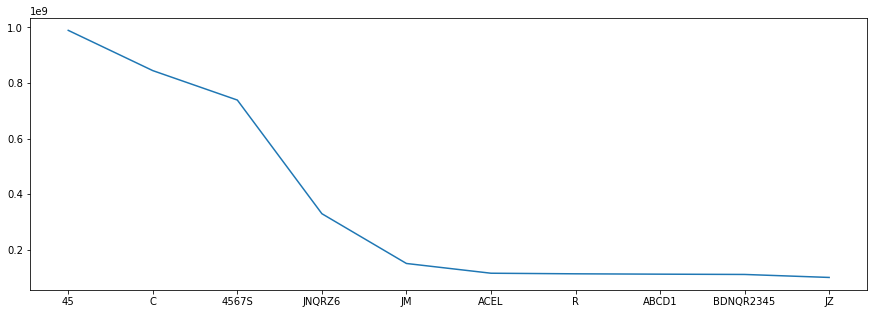

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(result.head(10)['LINENAME'], result.head(10)['Count_Entries'])

In [69]:
df_Busy_Station = df_temp.groupby('STATION').traffic.sum().reset_index()
mask = (df_Busy_Station['traffic'] > 0)

df_Busy_Station.columns
df_Busy_Station1 = df_Busy_Station[ mask]
df_Busy_Station1.head(10)

,STATION,traffic
1,103 ST,2.843060e+07
2,103 ST-CORONA,9.353383e+06
3,104 ST,2.665355e+09
7,116 ST-COLUMBIA,1.848211e+07
8,121 ST,1.403619e+08
9,125 ST,3.414116e+09
11,137 ST CITY COL,1.361968e+06
12,138/GRAND CONC,1.940740e+09
13,14 ST,8.422456e+07
14,14 ST-UNION SQ,1.659549e+07


In [72]:
result = df_Busy_Station1.sort_values(['traffic'], ascending=[0])

result.head()

,STATION,traffic
9,125 ST,3.414116e+09
84,57 ST-7 AV,2.707215e+09
3,104 ST,2.665355e+09
170,CANAL ST,2.362002e+09
12,138/GRAND CONC,1.940740e+09


<BarContainer object of 10 artists>

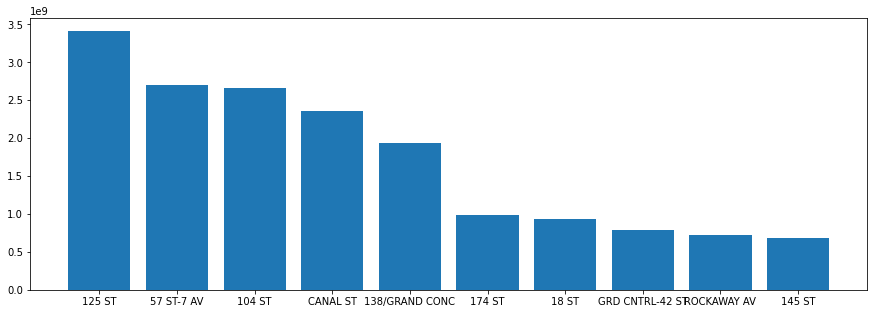

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(result.head(10)['STATION'], result.head(10)['traffic'])

<BarContainer object of 3 artists>

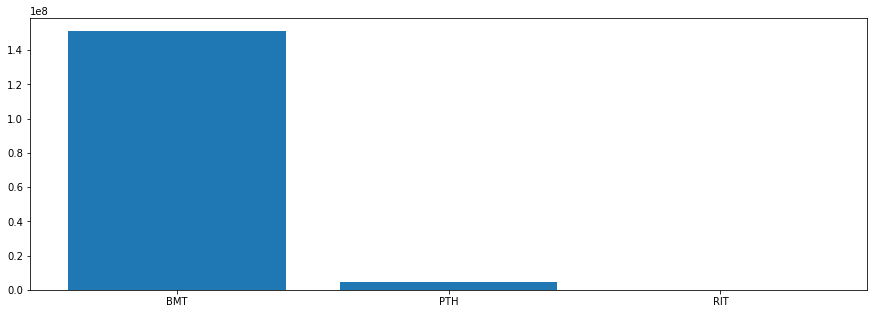

In [75]:
df_Busy_DIVISION = df_temp.groupby('DIVISION').traffic.sum().reset_index()
mask = (df_Busy_DIVISION['traffic'] > 0)
df_Busy_DIVISION1 = df_Busy_DIVISION[ mask]
result = df_Busy_DIVISION1.sort_values(['traffic'], ascending=[0])
plt.figure(figsize=(15,5))
plt.bar(result.head(10)['DIVISION'], result.head(10)['traffic'])

In [81]:
Mask_week_end = ((df_temp['Day_Name'] == 'Saturday') | (df_temp['Day_Name'] == 'Sunday'))
df_Busy_Count_Week_End = df_temp[ Mask_week_end]


In [83]:
df_Busy_Count_Week_End.shape

(54590, 17)